# Items Prediction Process

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import time
from prediction_functions import *
import logging

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("elasticsearch").setLevel(logging.WARNING)

## Prediction Process on approx. 12500 items

#### Get the data from ES and create a pandas dataframe

In [4]:
q_one = es_to_df("2020-06-11 00:00:00","2020-06-17 20:00:00", 20, "censhare", 'localhost', 9200, 720)
q_two = es_to_df("2020-06-11 00:00:00","2020-06-17 20:00:00", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 1.99 time elapsed
INFO:root:ES to Df: 5.91 time elapsed


#### Overview of the size value in the last days

In [5]:
q_one_size = q_one['size'].values
q_two_size = q_two['size'].values

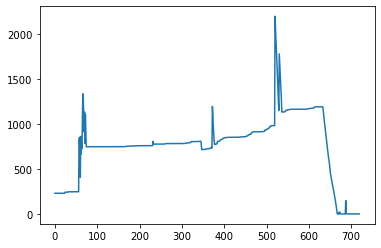

In [6]:
plt.plot(q_one_size)

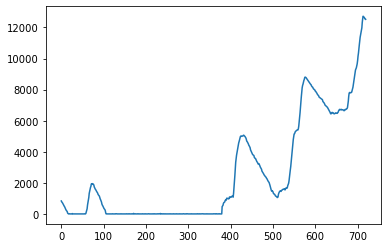

In [7]:
plt.plot(q_two_size)

#### Create the feature enriched dataset for each item

In [8]:
X = create_dataset_predict(q_one, q_two)

INFO:root:12525 items in the first and second queue combined with duplicates
INFO:root:2 items in the first queue without duplicates
INFO:root:12521 items in the second queue without duplicates
INFO:root:12523 items in the first and second queue combined without duplicates
INFO:root:12523 samples created in the dataset
INFO:root:Create dataset: 17.45 time elapsed


#### Scaling & Padding

In [9]:
X_pad_scaled, X_pad = scale_pad(X, 720, './models/scalerx_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p')

INFO:root:Scaling: 14.41 time elapsed


#### Load Model

In [10]:
final_df = predict_upload(q_two, X, X_pad, X_pad_scaled,'./models/scalery_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p', 'localhost', 
               9200, './models/best_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.h5', 'queues-prediction', 20)

INFO:root:Index queues-prediction has been refreshed


10 Elemente hochgeladen
20 Elemente hochgeladen
30 Elemente hochgeladen
40 Elemente hochgeladen
50 Elemente hochgeladen
60 Elemente hochgeladen
70 Elemente hochgeladen
80 Elemente hochgeladen
90 Elemente hochgeladen
100 Elemente hochgeladen
110 Elemente hochgeladen


INFO:root:Prediction and upload for 2020-06-17 19:50:04.668814+00:00: 22.06 time elapsed


120 Elemente hochgeladen
130 Elemente hochgeladen


In [11]:
final_df

,items,size,timestamp
0,1000329377 1000662362 1000928402 1000939801 10...,12523,2020-06-17T20:00:04.668814+0000
1,1000329377 1000662362 1000928402 1000939801 10...,12523,2020-06-17T20:10:04.668814+0000
2,1000329377 1000662362 1000928402 1000939801 10...,12523,2020-06-17T20:20:04.668814+0000
3,1000329377 1000662362 1000928402 1000939801 10...,12523,2020-06-17T20:30:04.668814+0000
4,1000329377 1000662362 1000928402 1000939801 10...,12523,2020-06-17T20:40:04.668814+0000
...,...,...,...
127,1018971756 1028252237 1041829662 104484083 104...,916,2020-06-18T17:10:04.668814+0000
128,1018971756 1028252237 1041829662 104484083 104...,888,2020-06-18T17:20:04.668814+0000
129,1018971756 108156517 1084789809 109205028 1105...,229,2020-06-18T17:30:04.668814+0000
130,1018971756 108156517 109205028 110532583 11401...,201,2020-06-18T17:40:04.668814+0000


In [12]:
final_df['size'].values

array([12523, 12523, 12523, 12523, 12523, 12523, 12523, 12523, 12523,
       12523, 12522, 11686, 11149, 11149, 11077, 11075, 11053, 11052,
       11052, 11052, 10993, 10969, 10851, 10848, 10848, 10848, 10848,
       10848, 10848, 10848, 10848, 10848, 10847, 10847, 10847, 10847,
       10847, 10847, 10847, 10847, 10847, 10847, 10847, 10847, 10847,
       10846, 10844, 10844, 10843, 10841, 10841, 10841, 10841, 10840,
       10840, 10838, 10838, 10838, 10838, 10838, 10836, 10836, 10836,
       10822, 10821, 10821, 10821, 10821, 10821, 10821, 10820, 10820,
       10820, 10820, 10781, 10781, 10773, 10773, 10773, 10773, 10773,
       10772, 10772, 10767, 10764, 10584, 10183, 10087,  9947,  9862,
        9719,  9638,  9525,  9368,  8969,  8614,  8556,  8531,  8447,
        8362,  8155,  8036,  7895,  7491,  7333,  7106,  7077,  7063,
        7050,  7038,  7032,  7031,  7004,  6989,  6975,  6958,  6735,
        6347,  5466,  4829,  4114,  3249,  2716,  1609,   973,   968,
         939,   916,

## Prediction Process on approx. 7000 items

In [13]:
q_one = es_to_df("2020-06-10 00:00:00","2020-06-16 18:00:00", 20, "censhare", 'localhost', 9200, 720)
q_two = es_to_df("2020-06-10 00:00:00","2020-06-16 18:00:00", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 1.93 time elapsed
INFO:root:ES to Df: 3.68 time elapsed


#### Overview of the size value in the last days

In [14]:
q_one_size = q_one['size'].values
q_two_size = q_two['size'].values

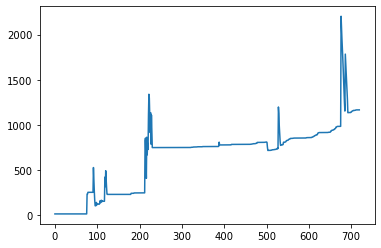

In [15]:
plt.plot(q_one_size)

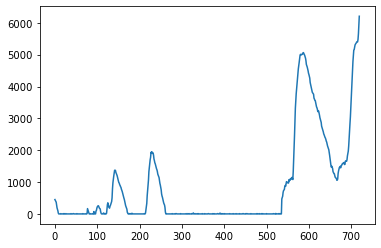

In [16]:
plt.plot(q_two_size)

#### Create the feature enriched dataset for each item

In [17]:
X = create_dataset_predict(q_one, q_two)

INFO:root:7373 items in the first and second queue combined with duplicates
INFO:root:1167 items in the first queue without duplicates
INFO:root:6205 items in the second queue without duplicates
INFO:root:7252 items in the first and second queue combined without duplicates
INFO:root:7244 samples created in the dataset
INFO:root:Create dataset: 9.35 time elapsed


#### Scaling & Padding

In [18]:
X_pad_scaled, X_pad = scale_pad(X, 720, './models/scalerx_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p')

INFO:root:Scaling: 8.60 time elapsed


#### Load Model

In [19]:
final_df = predict_upload(q_two, X, X_pad, X_pad_scaled,'./models/scalery_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p', 'localhost', 
               9200, './models/best_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.h5', 'queues-prediction', 20)

INFO:root:Index queues-prediction has been refreshed


10 Elemente hochgeladen
20 Elemente hochgeladen
30 Elemente hochgeladen
40 Elemente hochgeladen
50 Elemente hochgeladen
60 Elemente hochgeladen
70 Elemente hochgeladen
80 Elemente hochgeladen


INFO:root:Prediction and upload for 2020-06-16 17:50:03.943201+00:00: 14.60 time elapsed


## Prediction Process on approx. 3000 items

In [20]:
q_one = es_to_df("2020-06-10 00:00:00","2020-06-16 12:00:00", 20, "censhare", 'localhost', 9200, 720)
q_two = es_to_df("2020-06-10 00:00:00","2020-06-16 12:00:00", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 1.58 time elapsed
INFO:root:ES to Df: 3.29 time elapsed


#### Overview of the size value in the last days

In [21]:
q_one_size = q_one['size'].values
q_two_size = q_two['size'].values

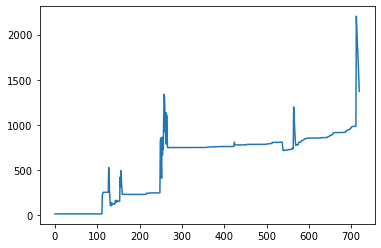

In [22]:
plt.plot(q_one_size)

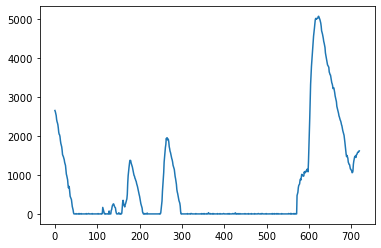

In [23]:
plt.plot(q_two_size)

#### Create the feature enriched dataset for each item

In [24]:
X = create_dataset_predict(q_one, q_two)

INFO:root:2986 items in the first and second queue combined with duplicates
INFO:root:1371 items in the first queue without duplicates
INFO:root:1615 items in the second queue without duplicates
INFO:root:2797 items in the first and second queue combined without duplicates
INFO:root:2790 samples created in the dataset
INFO:root:Create dataset: 4.08 time elapsed


#### Scaling & Padding

In [25]:
X_pad_scaled, X_pad = scale_pad(X, 720, './models/scalerx_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p')

INFO:root:Scaling: 3.29 time elapsed


#### Load Model

In [26]:
final_df = predict_upload(q_two, X, X_pad, X_pad_scaled,'./models/scalery_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p', 'localhost', 
               9200, './models/best_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.h5', 'queues-prediction', 20)

INFO:root:Index queues-prediction has been refreshed


10 Elemente hochgeladen
20 Elemente hochgeladen
30 Elemente hochgeladen
40 Elemente hochgeladen
50 Elemente hochgeladen
60 Elemente hochgeladen
70 Elemente hochgeladen
80 Elemente hochgeladen


INFO:root:Prediction and upload for 2020-06-16 11:50:02.677706+00:00: 6.99 time elapsed


## Prediction Process on approx. 1000 items

In [27]:
q_one = es_to_df("2020-06-09 00:00:00","2020-06-14 20:00:00", 20, "censhare", 'localhost', 9200, 720)
q_two = es_to_df("2020-06-09 00:00:00","2020-06-14 20:00:00", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 1.25 time elapsed
INFO:root:ES to Df: 2.40 time elapsed


#### Overview of the size value in the last days

In [28]:
q_one_size = q_one['size'].values
q_two_size = q_two['size'].values

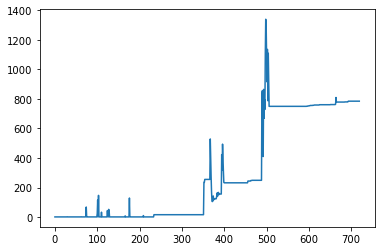

In [29]:
plt.plot(q_one_size)

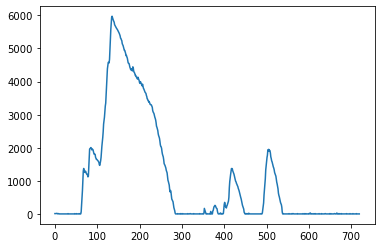

In [30]:
plt.plot(q_two_size)

#### Create the feature enriched dataset for each item

In [31]:
X = create_dataset_predict(q_one, q_two)

INFO:root:785 items in the first and second queue combined with duplicates
INFO:root:785 items in the first queue without duplicates
INFO:root:1 items in the second queue without duplicates
INFO:root:785 items in the first and second queue combined without duplicates
INFO:root:785 samples created in the dataset
INFO:root:Create dataset: 1.35 time elapsed


#### Scaling & Padding

In [32]:
X_pad_scaled, X_pad = scale_pad(X, 720, './models/scalerx_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p')

INFO:root:Scaling: 0.90 time elapsed


#### Load Model

In [33]:
final_df = predict_upload(q_two, X, X_pad, X_pad_scaled,'./models/scalery_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.p', 'localhost', 
               9200, './models/best_outlier_25_300_2020-06-09_2020-06-13_20epochs_720steps_20srate.h5', 'queues-prediction', 20)

INFO:root:Index queues-prediction has been refreshed


10 Elemente hochgeladen
20 Elemente hochgeladen
30 Elemente hochgeladen
40 Elemente hochgeladen
50 Elemente hochgeladen
60 Elemente hochgeladen
70 Elemente hochgeladen
80 Elemente hochgeladen
90 Elemente hochgeladen
100 Elemente hochgeladen


INFO:root:Prediction and upload for 2020-06-14 19:50:01.899946+00:00: 3.99 time elapsed
